<a href="https://colab.research.google.com/github/deep-pooja/Dynamic_Graph_Clustering/blob/main/graph_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proof of Concept**
-------------------------

Concept
A fast heuristic to compute clustering on dynamic graphs/network.

*   Aid decision making using visualization.
*   Identifying groups in Netwoks


### Method to compute 'k' clusters in a large graph/network(undirected & unweighted)

Input: {G(V,E), k, optional:init_cluster(G,k)}

Output: cluster

### Scketch of the method:

1. If Init_Cluster == NULL:

      cluster = init_cluster(G,k)

// Now, making improvement
2. Do

   for i = Shuffle[1:N]  process values 1.....N in random order
       
       previous = cluster[i]
       
       QI_prev = Quality_index()

#########################################################################

Initial_Cluster(G,k):
  
1.  embedding_G = force-directed_embedding(G) # use standard force-directed  based algorithm for embedding, Do we using a data stucture to efficienlty store the embedding? or is it completely being stored on disk?

2.  coreset_E = coreset(embedding_G,k)

3.  cluster = kmean(coreset_E,k)
  
4.  for point in embedding_G/coreset_E:
     
        cluster.append(kmean.predict(point))

5.  return cluster

Can be extended to online by computing


In [ ]:
from numpy.random.mtrand import geometric
#importing requirements
import pandas as pd
import torcgeometric


In [ ]:
#Exploring temporal DBLP dataset
! git clone https://github.com/iHeartGraph/Euler.git

In [ ]:
import pandas as pd
read_DBLP = pd.read_csv("/content/sorted_dblp_temporal_2018April.csv")
read_DBLP.head(5)

ParserError: ignored

In [ ]:
%run -i "/content/Euler/benchmarks/loaders/load_utils.py"
%run -i "/content/Euler/benchmarks/loaders/load_vgrnn.py"

ModuleNotFoundError: ignored

In [ ]:
def Initial_Clustering(G,k,sample_size):

  cluster = []

  em = force_directed_embedding(G)
  sub_em = compute_corset(em,k,sample_size)
  km = KMeans(n_clusters=k).fit(sub_em)    # note that, clustering is only computed on subset of coordinates(coreset) not on the entire coordinates

  for item in em:
    cluster.append(km.predict(item))

  return cluster

In [ ]:
pip install s_gd2

     |████████████████████████████████| 416 kB 8.0 MB/s 


In [ ]:
import s_gd2
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

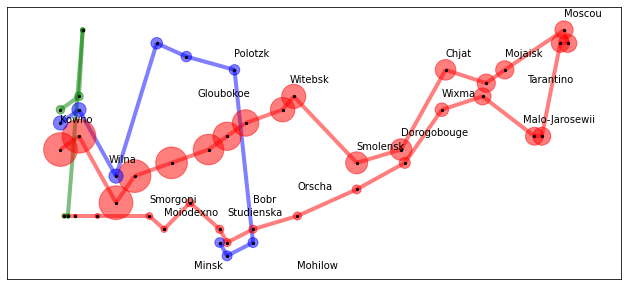

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split("\n"):
        x, y, name = line.split(",")
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split("\n"):
            x, y, p, r, n = line.split(",")
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


(g, city) = minard_graph()

plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["r", "b", "g"]
for G in g:
    c = colors.pop(0)
    node_size = [int(G.pop[n] / 300.0) for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

In [ ]:
import gzip
from string import ascii_lowercase as lowercase

import matplotlib.pyplot as plt
import networkx as nx


def generate_graph(words):
    G = nx.Graph(name="words")
    lookup = {c: lowercase.index(c) for c in lowercase}

    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i + 1 :]
            j = lookup[c]  # lowercase.index(c)
            for cc in lowercase[j + 1 :]:
                yield left + cc + right

    candgen = (
        (word, cand)
        for word in sorted(words)
        for cand in edit_distance_one(word)
        if cand in words
    )
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G


def words_graph():
    """Return the words example graph from the Stanford GraphBase"""
    fh = gzip.open("/content/words_dat.txt.gz", "r")
    words = set()
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):
            continue
        w = str(line[0:5])
        words.add(w)
    return generate_graph(words)


G = words_graph()
print("Loaded words_dat.txt containing 5757 five-letter English words.")
print("Two words are connected if they differ in one letter.")
print(G)
print(f"{nx.number_connected_components(G)} connected components")

for (source, target) in [("chaos", "order"), ("nodes", "graph"), ("pound", "marks")]:
    print(f"Shortest path between {source} and {target} is")
    try:
        shortest_path = nx.shortest_path(G, source, target)
        for n in shortest_path:
            print(n)
    except nx.NetworkXNoPath:
        print("None")


# draw a subset of the graph
boundary = list(nx.node_boundary(G, shortest_path))
G.add_nodes_from(shortest_path, color="red")
G.add_nodes_from(boundary, color="blue")
H = G.subgraph(shortest_path + boundary)
colors = nx.get_node_attributes(H, "color")
options = {"node_size": 100, "alpha": 0.3, "node_color": colors.values()}
pos = nx.kamada_kawai_layout(H)
nx.draw(H, pos, **options)
nx.draw_networkx_labels(H, pos)
plt.show()

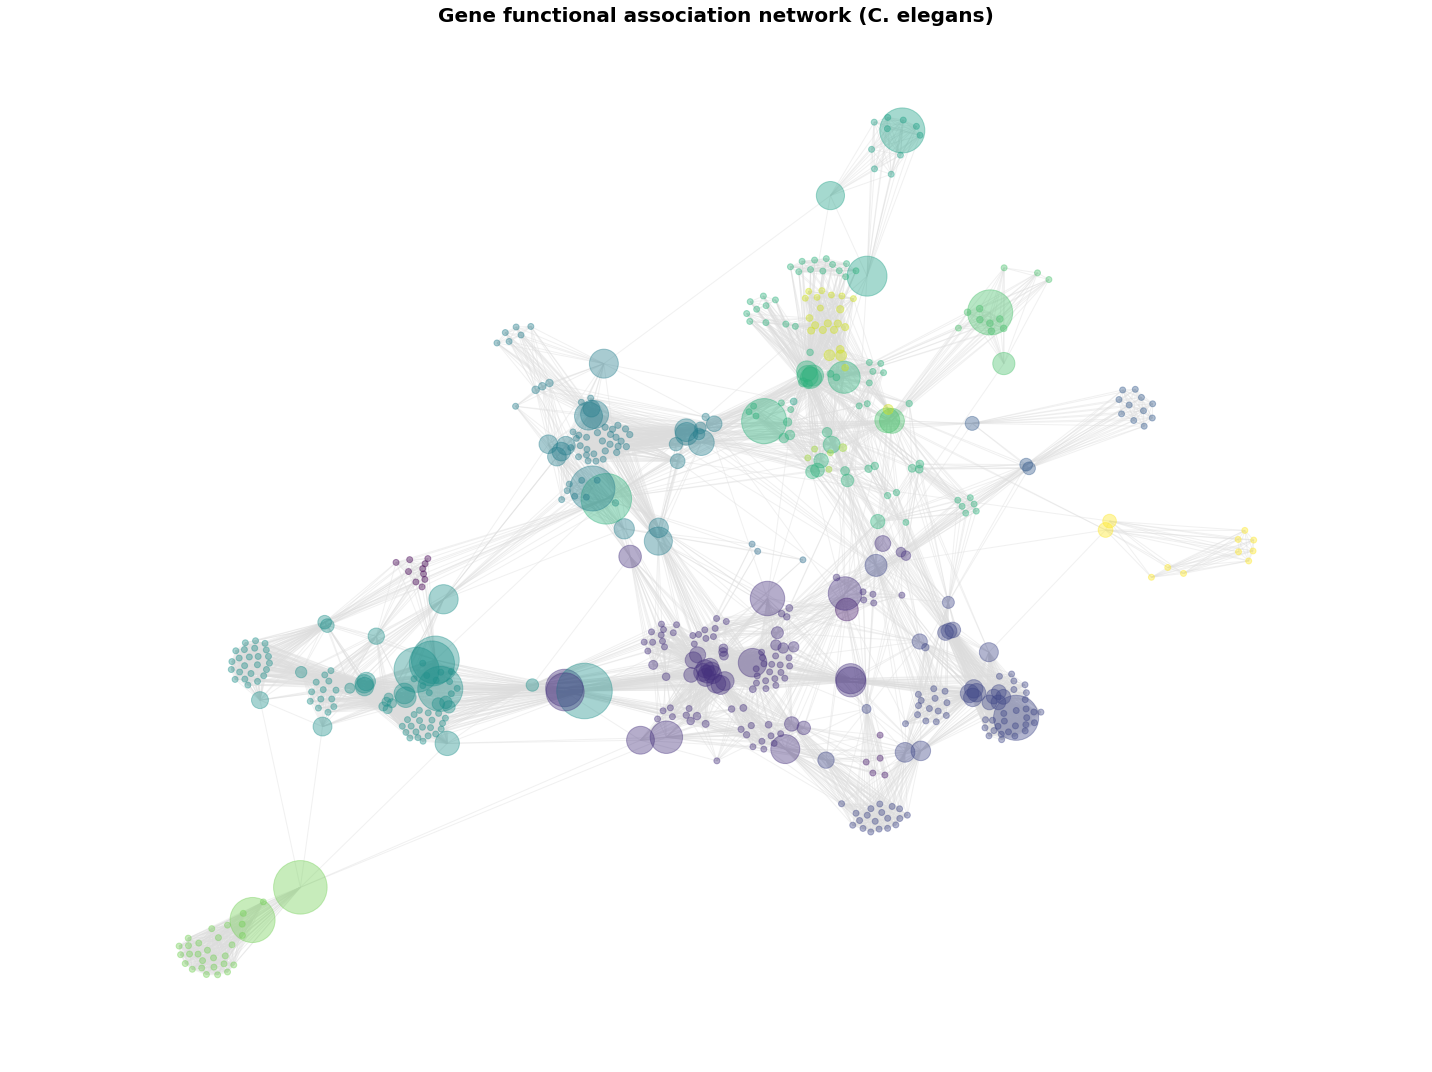

In [ ]:
from random import sample
import networkx as nx
import matplotlib.pyplot as plt

# Gold standard data of positive gene functional associations
# from https://www.inetbio.org/wormnet/downloadnetwork.php
G = nx.read_edgelist("/content/WormNet.v3.benchmark.txt")

# remove randomly selected nodes (to make example fast)
num_to_remove = int(len(G) / 1.5)
nodes = sample(list(G.nodes), num_to_remove)
G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in G.degree() if d < 10]
G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    H,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Gene functional association network (C. elegans)", font)
# Change font color for legend
font["color"] = "b"
"""
ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
"""
# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [ ]:
!pip install geopandas

In [ ]:
!pip install libpysal

In [ ]:
G = nx.karate_club_graph()
e = list(G.edges())
e

In [ ]:
  x = [a_tuple[0] for a_tuple in e]
  y = [a_tuple[1] for a_tuple in e]

In [ ]:
l = s_gd2.layout(x,y)

In [ ]:
data_x = [item[0] for item in l]
data_y = [item[1] for item in l]

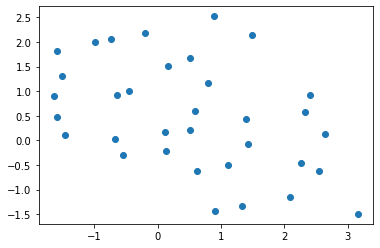

In [ ]:
plt.scatter(data_x, data_y)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(l)

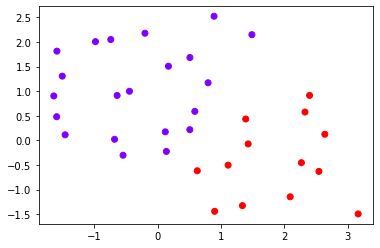

In [ ]:
plt.scatter(l[:,0],l[:,1], c=kmeans.labels_, cmap='rainbow')

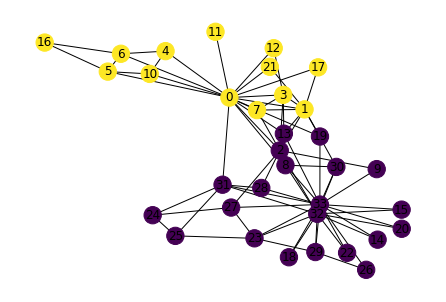

In [ ]:
nx.draw(G, node_color=kmeans.labels_, with_labels=True)
plt.show()

In [ ]:
from sklearn.manifold import SpectralEmbedding
import networkx as nx

In [ ]:
embedding = SpectralEmbedding(n_components=2,affinity='precomputed')

In [ ]:
A = nx.adjacency_matrix(G)
c = embedding.fit_transform(A)

In [ ]:
!pip install mst_clustering
from mst_clustering import MSTClustering

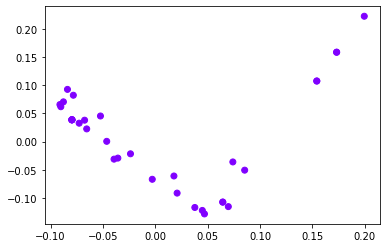

In [ ]:
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=2, approximate=False)
labels = model.fit_predict(c)
plt.scatter(c[:, 0], c[:, 1], c=labels, cmap='rainbow');

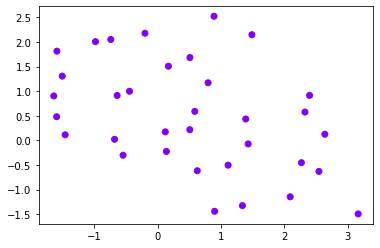

In [ ]:
plt.scatter(l[:,0],l[:,1], c=labels, cmap='rainbow')

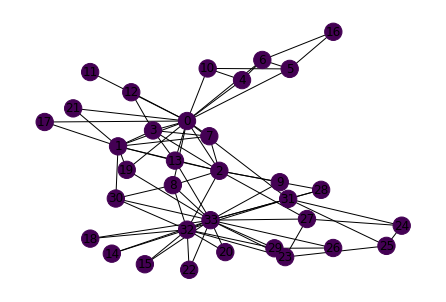

In [ ]:
nx.draw(G, node_color=labels, with_labels=True)
plt.show()

In [ ]:
pip install jgrapht

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

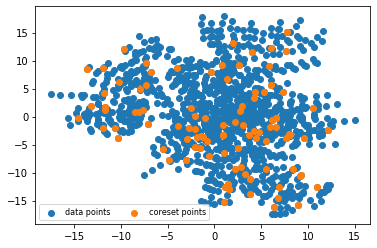

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

core_x = [item[0] for item in coreset]

core_y = [item[1] for item in coreset]
data_x = [item[0] for item in l]
data_y = [item[1] for item in l]

d = plt.scatter(data_x, data_y)
c = plt.scatter(core_x, core_y)
plt.legend((d,c),
           ('data points', 'coreset points'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

In [ ]:
el= pd.read_csv("/content/results/1000_100_15_0.6_0.8_0.2_1/graph-99.txt", sep='\s+', header=None, names=['Node1','Node2'])
el.head()

,Node1,Node2
0,0,636
1,0,597
2,0,889
3,0,684
4,0,637


In [ ]:
communities = pd.read_csv("/content/results/1000_100_15_0.6_0.8_0.2_1/communities-1.txt", sep='\s+', header=None, names=['id','community'])
communities.head()

In [ ]:
node1 = el['Node1'].tolist()
node2 = el['Node2'].tolist()

In [ ]:
with open("/content/results/1000_100_15_0.6_0.8_0.2_1/graph-99.txt", "r") as edgelist:
  lines = edgelist.readlines()
  x = []
  y = []
  for l in lines:
    l= l.strip()
    as_list = l.split(" ")
    #print(as_list)
    x.append(as_list[0])
    y.append(as_list[1])

In [ ]:
x = [int(i) for i in x]
y = [int(i) for i in y]


In [ ]:
0 in y

False

In [ ]:
l= s_gd2.layout_sparse(node1, node2,150)
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# save to csv file
savetxt(r'/content/coordinates_eva.csv', l, delimiter=',')
filepath = "/content/layout_eva.svg"
s_gd2.draw_svg(l, x, y, filepath)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def dist_to_B(x, B, return_closest_index=False):
    min_dist = np.inf
    closest_index = -1
    for i, b in enumerate(B):
        dist = np.linalg.norm(x - b)
        if dist < min_dist:
            min_dist = dist
            closest_index = i
    if return_closest_index:
        return min_dist, closest_index
    return min_dist
"""
function to get the list of k center from datapoints
"""

def Algorithm1(data_vectors, k):
    "D^2-sampling"
    B = []
    B.append(data_vectors[np.random.choice(len(data_vectors))])

    for _ in range(k - 1):
        p = np.zeros(len(data_vectors))
        for i, x in enumerate(data_vectors):
            p[i] = dist_to_B(x, B) ** 2
        p = p / sum(p)
        B.append(data_vectors[np.random.choice(len(data_vectors), p=p)])

    return B



In [ ]:
# static coreset algorithm implementation
def BFL16(P, B, m):
    """Algorithm 2 in https://arxiv.org/pdf/1612.00889.pdf [BFL16].
    Per Table 1, the coreset size is O(k^2 logk / eps^3) or O(dk logk / eps^2)
    Note that D(p, q) appears to be the squared distance dist(p, q) ** 2 (top of pg 23)
    We're using the best of N k-means++ initializations for the (alpha, beta) approximation.
    P is the list of points, B is a list of k-means++ cluster center initializations.
    """

    num_points_in_clusters = {i: 0 for i in range(len(B))}
    sum_distance_to_closest_cluster = 0
    for p in P:
        min_dist, closest_index = dist_to_B(p, B, return_closest_index=True)
        num_points_in_clusters[closest_index] += 1
        sum_distance_to_closest_cluster += min_dist ** 2

    Prob = np.zeros(len(P))
    for i, p in enumerate(P):
        min_dist, closest_index = dist_to_B(p, B, return_closest_index=True)
        Prob[i] += min_dist ** 2 / (2 * sum_distance_to_closest_cluster)
        Prob[i] += 1 / (2 * len(B) * num_points_in_clusters[closest_index])

    assert 0.999 <= sum(Prob) <= 1.001, 'sum(Prob) = %s; the algorithm should automatically '\
            'normalize Prob by construction' % sum(Prob)
    chosen_indices = np.random.choice(len(P), size=m, p=Prob)
    weights = [1 / (m * Prob[i]) for i in chosen_indices]

    return [P[i] for i in chosen_indices]

In [ ]:
B = Algorithm1(l,4)

coreset = BFL16(l, B, 100)

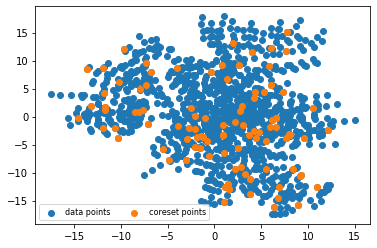

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

core_x = [item[0] for item in coreset]

core_y = [item[1] for item in coreset]
data_x = [item[0] for item in l]
data_y = [item[1] for item in l]

d = plt.scatter(data_x, data_y)
c = plt.scatter(core_x, core_y)
plt.legend((d,c),
           ('data points', 'coreset points'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
def get_cost(data_vectors, center_points):
    cost = 0
    for x in data_vectors:
        for c in center_points:
          d1=(x[0]-c[0])**2
          d2=(x[1]-c[1])**2
          d=np.sqrt(d1+d2)
          cost += d
    return cost
kmeans_plain = KMeans(n_clusters=4).fit(l)
get_cost(l, kmeans_plain.cluster_centers_)

54090.48925895661

In [ ]:
kmeans = KMeans(n_clusters=4).fit(coreset)
kmeans_coreset_cost = get_cost(coreset, kmeans.cluster_centers_)
kmeans_coreset_cost

4969.350289449272

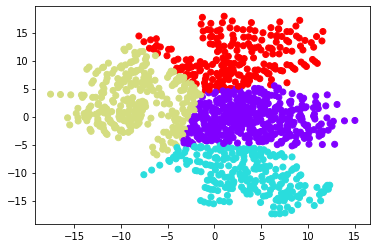

In [ ]:
plt.scatter(l[:,0],l[:,1], c=kmeans_plain.labels_, cmap='rainbow')


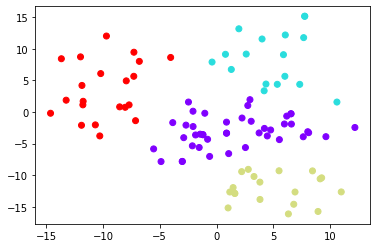

In [ ]:
plt.scatter(core_x,core_y, c=kmeans.labels_, cmap='rainbow')

No handles with labels found to put in legend.


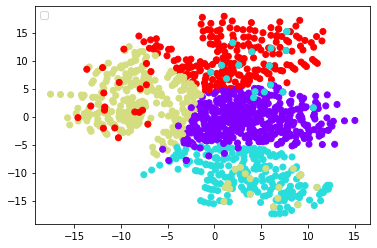

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(l[:,0],l[:,1], c=kmeans_plain.labels_, cmap='rainbow')
ax1.scatter(core_x,core_y, c=kmeans.labels_, cmap='rainbow')
plt.legend(loc='upper left');
plt.show()

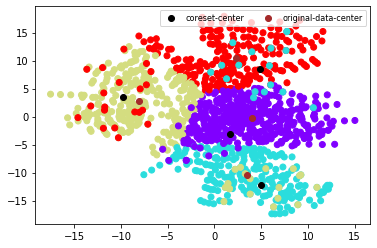

In [ ]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.scatter(l[:,0],l[:,1], c=kmeans_plain.labels_, cmap='rainbow')
ax2.scatter(core_x,core_y, c=kmeans.labels_, cmap='rainbow')
m = ax2.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
n = ax2.scatter(kmeans_plain.cluster_centers_[:,0] ,kmeans_plain.cluster_centers_[:,1], color='brown')
plt.legend((m,n),
           ('coreset-center', 'original-data-center'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.show()

In [ ]:
res1 = list(map(max, zip(*l)))
res2 = list(map(min, zip(*l)))
print(res1)
print(res2)

[15.028049522134612, 17.915183489939164]
[-17.53919458980024, -17.38661508026049]


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
def plot():
  plt.xlim(-18, 16)
  plt.ylim(-18, 18)
  plt.scatter(x, y, label= "points", color= "black", marker= "o", s=10)
  plt.show()

In [ ]:
x = []
y = []
n = 20

for i in range(n):
  x.append(40 + random.random()*70)
  y.append(40 + random.random()*70)
with open('/content/x.txt', 'w') as f:
    for item in x:
        f.write("%s\n" % item)
with open('/content/y.txt', 'w') as f:
    for item in y:
        f.write("%s\n" % item)
plt.title('randomly generated points for Convex Hull')
plot()

In [ ]:
from sklearn.cluster import SpectralClustering
S_clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(l)

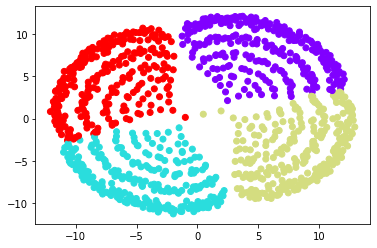

In [ ]:
plt.scatter(l[:,0],l[:,1], c=S_clustering.labels_, cmap='rainbow')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random


def ER(n, p):
    V = set([v for v in range(n)])
    E = []
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.append(combination)

    #print(E)

    return E


n = 50
p = 0.2
e = ER(n, p)
I = [i[0] for i in e]
J = [i[1] for i in e]
import s_gd2

e_layout = s_gd2.layout(I,J)
s_gd2.draw_svg(e_layout,I,J, 'e_layout.svg')

In [ ]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


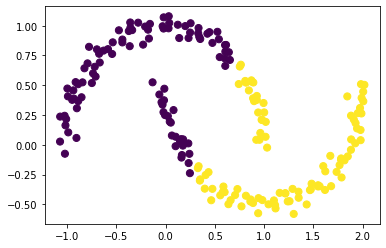

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [ ]:
B_p = Algorithm1(X,4)

coreset_p = BFL16(X, B_p, 30)

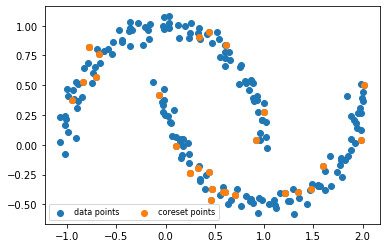

In [ ]:
corex = [item[0] for item in coreset_p]

corey = [item[1] for item in coreset_p]
datax = [item[0] for item in X]
datay = [item[1] for item in X]

d = plt.scatter(datax, datay)
c = plt.scatter(corex, corey)
plt.legend((d,c),
           ('data points', 'coreset points'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

In [ ]:
kmean = KMeans(n_clusters=2).fit(coreset_p)
kmeans_coreset_cost = get_cost(coreset, kmean.cluster_centers_)
kmeans_coreset_cost

3962.7037421813898

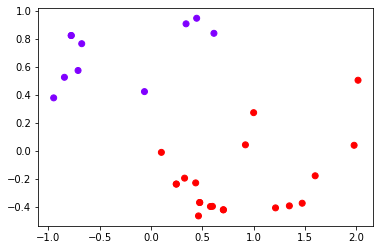

In [ ]:
plt.scatter(corex,corey, c=kmean.labels_, cmap='rainbow')